# Lesson 0039 - The Bible Word Cloud
In this lesson, we will create a cloud of words from the bible in order to show the neighbourhood of words  with each other.<br>
We will start with stealing code from [lesson 0036](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0036_the_bible_text_generation.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [3]:
import keras
from keras import models
from keras import layers
from keras import utils
import keras.backend as b

print( keras.__version__ )

2.2.4


Using TensorFlow backend.


In [4]:
path = utils.get_file( "bible.txt", 
                      origin = "https://raw.githubusercontent.com/mxw/grmr/master/src/finaltests/bible.txt" )

text = open( path ).read().lower()

print( text[ 0 : 1000 ] )

1:1 in the beginning god created the heaven and the earth.

1:2 and the earth was without form, and void; and darkness was upon
the face of the deep. and the spirit of god moved upon the face of the
waters.

1:3 and god said, let there be light: and there was light.

1:4 and god saw the light, that it was good: and god divided the light
from the darkness.

1:5 and god called the light day, and the darkness he called night.
and the evening and the morning were the first day.

1:6 and god said, let there be a firmament in the midst of the waters,
and let it divide the waters from the waters.

1:7 and god made the firmament, and divided the waters which were
under the firmament from the waters which were above the firmament:
and it was so.

1:8 and god called the firmament heaven. and the evening and the
morning were the second day.

1:9 and god said, let the waters under the heaven be gathered together
unto one place, and let the dry land appear: and it was so.

1:10 and god called the d

Now, we will clean up the text. We want, that in the resulting text only letters appear.<br>
First, we create a list of punctuation characters, and then we add stuff like "\n". We also add numbers.

In [5]:
import string



punctuation = string.punctuation


new_punctuation = []


for i in range( len( punctuation ) ):
    
    new_punctuation.append( punctuation[ i ] )
    
    
    
    
new_punctuation.append( "\n" )

new_punctuation.append( "0" )

new_punctuation.append( "1" )

new_punctuation.append( "2" )

new_punctuation.append( "3" )

new_punctuation.append( "4" )

new_punctuation.append( "5" )

new_punctuation.append( "6" )

new_punctuation.append( "7" )

new_punctuation.append( "8" )

new_punctuation.append( "9" )

new_punctuation.append( "" )




punctuation = new_punctuation





concat = ""




for item in punctuation:
    
    concat = concat + item
    
    
    

punctuation = concat




print( punctuation )

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0123456789


Now, we clean up the text. First, we split the text at " ". Then, we cut the stuff from __punctuation__.<br>
For this, we employ the functions [maketrans](https://docs.python.org/3/library/stdtypes.html#str.maketrans) and [translate](https://docs.python.org/3/library/stdtypes.html#str.translate).

In [6]:
new_text = []



intermediary = text.split()



replace = str.maketrans( "", "", punctuation )


for item in intermediary:
    
    new_text.append( item.translate( replace ) )
    
    
    

print( new_text[ 0 : 200 ] )

['', 'in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', '', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', 'and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', '', 'and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light', '', 'and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness', '', 'and', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night', 'and', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day', '', 'and', 'god', 'said', 'let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '', 'and', 'god', 'made', 'the', 'firmament', 'and', 'divided', 'the', 'waters', 'which'

We notice, that there are empty words in the text, so let's clean them.

In [7]:
new_text2 = []




for item in new_text:
    
    if len( item ) > 0:
        
        new_text2.append( item )
        
        
        
        
new_text = new_text2
        
        
        
print( new_text[ 0 : 200 ] )

['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', 'and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', 'and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light', 'and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness', 'and', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night', 'and', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day', 'and', 'god', 'said', 'let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', 'and', 'god', 'made', 'the', 'firmament', 'and', 'divided', 'the', 'waters', 'which', 'were', 'under', 'the', 'f

Next, we create three dictionaries. Two to store the individual words, and one to store these words and their number of appearences.

In [8]:
individual_words = dict()

individual_words_reverse = dict()

number_of_appearences = dict()

index = 0




for item in new_text:
    
    if item not in individual_words_reverse:
        
        individual_words[ index ] = item
        
        individual_words_reverse[ item ] = index
        
        number_of_appearences[ item ] = 1
        
        index = index + 1
        
    else:
        
        number_of_appearences[ item ] = number_of_appearences[ item ] + 1

We use this now to further reduce the text. We want to eliminate all words that appear less than $7$ times.<br>
Also, we cut the text to the first $10\%$.

In [9]:
new_text2 = []





new_text = new_text[ 0 : np.int( np.round( np.float( len( new_text ) / 10 ) ) ) ]




for item in new_text:
    
    if number_of_appearences[ item ] > 6:
        
        new_text2.append( item )
        
        
        
new_text = new_text2

print( new_text[ 0 : 200 ] )

['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', 'and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', 'and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light', 'and', 'god', 'saw', 'the', 'light', 'that', 'it', 'was', 'good', 'and', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness', 'and', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night', 'and', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day', 'and', 'god', 'said', 'let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', 'and', 'god', 'made', 'the', 'firmament', 'and', 'divided', 'the', 'waters', 'which', 'were', 'under', 'the', 'f

Now, we empty the dicitonaries and fill them again.

In [10]:
individual_words.clear()

individual_words_reverse.clear()

number_of_appearences.clear()

index = 0




for item in new_text:
    
    if item not in individual_words_reverse:
        
        individual_words[ index ] = item
        
        individual_words_reverse[ item ] = index
        
        number_of_appearences[ item ] = 1
        
        index = index + 1
        
    else:
        
        number_of_appearences[ item ] = number_of_appearences[ item ] + 1
        
        
        

        
print( index )

2543


Now, we create an embedding.<br>
For each sequence of $10$ words in __new_text__, we will create $20$ arrays, wherein the first $10$ arrays contain $9$ of the $10$ words, and the other $10$ arrays each contain the tenth word. This way, the first $10$ arrays contain the "neighbourhood" of the words in the second $10$ arrays. 

In [11]:
neighborhood = np.zeros( shape = [ ( len( new_text ) - 10 ) * 10, index ], dtype = np.bool )

neighbor = np.zeros( shape = [ ( len( new_text ) - 10 ) * 10, index ], dtype = np.bool )




j = 0




for i in range( len( new_text ) - 10 ):
    
    sequence = new_text[ i : ( i + 10 ) ]
    
    indices = []
    
    for item in sequence:
        
        indices.append( individual_words_reverse[ item ] )
        
    for k in indices:
        
        indices2 = []
        
        for l in indices:
            
            if l != k:
                
                indices2.append( l )
                
        for l in indices2:
            
            neighborhood[ j, l ] = 1
            
        neighbor[ j, k ] = 1
        
        j = j + 1

Now, we create a simple neural network with a hidden layer of $256$ neurons.

In [12]:
input_ = keras.engine.input_layer.Input( shape = ( index, ) )

x = layers.Dense( 256, activation = layers.LeakyReLU( alpha = 0.3 ) )( input_ )

output = layers.Dense( index, activation = "softmax" )( x )

model = keras.Model( input_, output )

model.compile( optimizer = keras.optimizers.SGD( lr = 0.1, momentum = 0.0, decay = 0.0, nesterov = False ),
               loss = "categorical_crossentropy", metrics = [ "accuracy" ] )

model.fit( neighborhood, neighbor, epochs = 100, batch_size = 100 )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\rhopi\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/100
778470/778470 [==============================] - 35s 45us/step - loss: 5.0921 - acc: 0.2079
Epoch 2/100
778470/778470 [==============================] - 33s 42us/step - loss: 4.4756 - acc: 0.2632
Epoch 3/100
778470/778470 [==============================] - 33s 42us/step - loss: 4.1470 - acc: 0.2934
Epoch 4/100
778470/778470 [==============================] - 33s 42us/step - loss: 3.8940 - acc: 0.3175
Epoch 5/100
778470/778470 [==============================] - 32s 42us/step - loss: 3.6806 - acc: 0.3393
Epoch 6/100
778470/778470 [==============================] - ETA: 0s - loss: 3.4928 - acc: 0.358 - 33s 42us/step - loss: 3.4928 - acc: 0.3585
Epoch 7/100
778470/778470 [==============================] - ETA: 0s - loss: 3.3237 - acc: 0.376 - 33s 42us/step - loss: 3.3237 - acc: 0.3765
Epoch 8/100
778470/778470 [==============================] - 33s 42us/step - loss: 3.1709 - acc: 0.3932
Epoch 9/100
778470/778470 [==============================] - 33s 42us/step - loss: 3.0312 - 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2543)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               651264    
_________________________________________________________________
dense_2 (Dense)              (None, 2543)              653551    
Total params: 1,304,815
Trainable params: 1,304,815
Non-trainable params: 0
_________________________________________________________________


By now, we have built the model that predicts for $9$ given words the tenth word in their neighbourhood.<br>
Next, we define a function, that predicts the output of the dense layer "dense_1". We can interprete this output as a mapping from the input space with __index__ words to $256$ dimensions. Thereby, "dense_1" reduces the dimensionality of the data set.

In [14]:
output = dict( [ ( layer.name, layer.output ) for layer in model.layers ] )

pred_fun = b.function( [ input_ ], [ output[ 'dense_1' ] ] )

Next, we map the words from __individual_words__ into the embedding space using __pred_fun__.

In [15]:
sampled_words = []

embedding = np.zeros( shape = [ index, 256 ] )

base = np.zeros( shape = [ 1, index ], dtype = np.bool )





for i in range( index ):
    
    sampled_words.append( individual_words[ i ] )
    
    base[ 0, i ] = 1
    
    embedding[ i, : ] = pred_fun( [ base ] )[ 0 ]
    
    base[ 0, i ] = 0

Now, we import sklearn in order to employ [tsne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). [TSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a dimensionality reduction scheme, that focuses on keeping close items nearby. We employ [fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE.fit_transform) to map the data from the $256$-dimensional embedding space to $2$-dimensional space.

In [16]:
import sklearn
from sklearn.manifold import TSNE

print( sklearn.__version__ )

0.20.3


In [17]:
two_d = TSNE( n_components = 2 ).fit_transform( X = embedding )

Now, we can plot this mapping. To keep everything visible, we only plot the first $70$ words.

In [18]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


([], <a list of 0 Text yticklabel objects>)

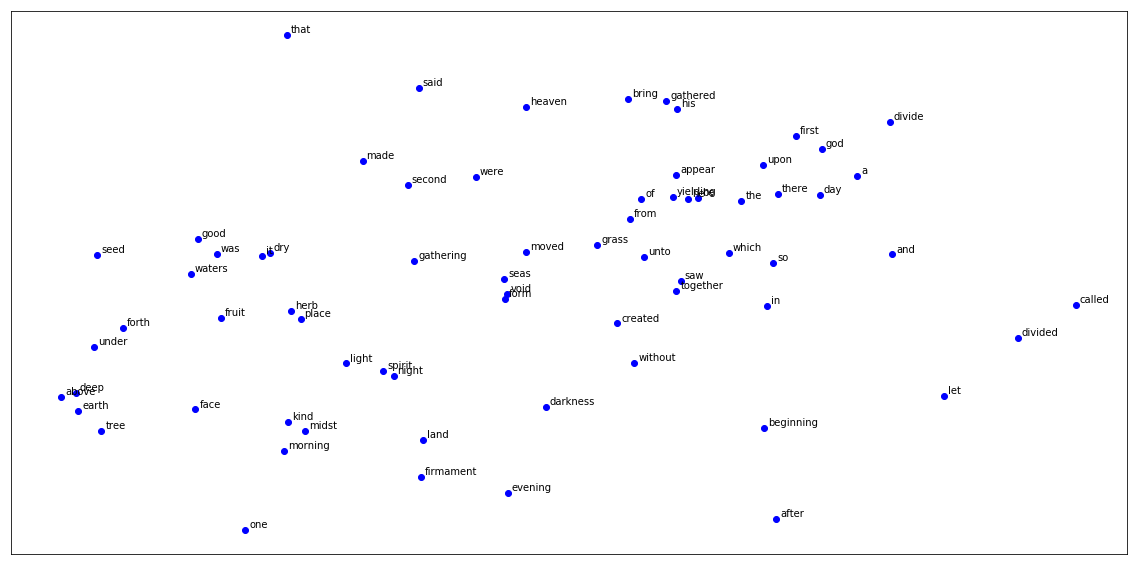

In [19]:
plt.figure( figsize = ( 20, 10 ) )


for i in range( 70 ):
    
    plt.plot( two_d[ i, 0 ], two_d[ i, 1 ], 'bo' )
    
    plt.text( two_d[ i, 0 ] + 0.03, two_d[ i, 1 ] + 0.03, sampled_words[ i ] )
    
    
plt.xticks( [] )

plt.yticks( [] )

We see, that "above" and "under" are very near, also "from" and "of", also "there" and "the". We recognize, that for several words, meaningful neighbourhoods have been established.<br>
Class dismissed.